In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [2]:
#Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 0us/step


In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:

train_images.shape

(60000, 28, 28)

il y a 60 000 images dans l'ensemble d'apprentissage, chaque image étant représentée en 28 x 28 pixels

In [14]:
len(train_labels)

60000

In [15]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Chaque étiquette est un entier compris entre 0 et 9 

In [16]:
test_images.shape

(10000, 28, 28)

In [17]:
len(test_labels)

10000

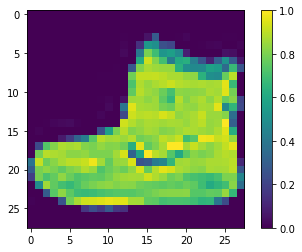

In [18]:
# premiere image de l'ensemble d'apprentissage
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
# prétraitement des données
#Convertir les exemples de données d'entiers en nombres à virgule flottante
train_images = train_images / 255.0

test_images = test_images / 255.0

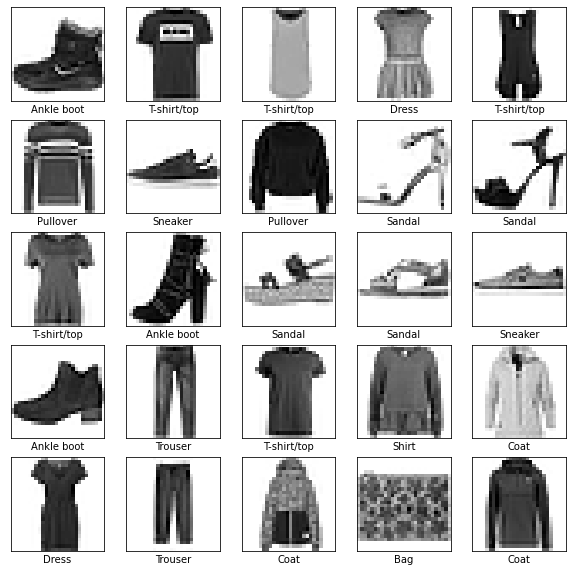

In [20]:
# afficher les 25 premières images de l'ensemble de formation et d' afficher le nom de la classe en dessous de chaque image.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [72]:
# construire le modèle
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

La première couche de ce réseau, tf.keras.layers.Flatten , transforme le format des images à partir d' un tableau à deux dimensions (de 28 par 28 pixels) à un réseau à une dimension (28 * 28 = 784 pixels). Considérez ce calque comme un dépilage de rangées de pixels dans l'image et leur alignement. Cette couche n'a pas de paramètres à apprendre ; il reformate seulement les données.

Après que les pixels sont aplaties, le réseau est constitué d'une séquence de deux tf.keras.layers.Dense couches. Ce sont des couches neuronales densément connectées ou entièrement connectées. La première Dense couche a 128 noeuds (ou de neurones). La deuxième (et dernière) couche renvoie un tableau logits d'une longueur de 10. Chaque nœud contient un score qui indique que l'image actuelle appartient à l'une des 10 classes.

In [73]:
#compiler le modèle 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

* Fonction de perte: cette mesure la précision du modèle est au cours de la formation. Vous voulez minimiser cette fonction pour "orienter" le modèle dans la bonne direction.
* Optimizer: ce est comment le modèle est mis à jour en fonction des données qu'il voit et sa fonction de perte.
* Metrics: utilisé pour suivre la formation et les étapes d' essai. L'exemple suivant utilise la précision, la fraction des images correctement classées.

In [23]:
#former le modèle
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0927 - accuracy: 0.6598
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6411 - accuracy: 0.7698
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5660 - accuracy: 0.7964
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5217 - accuracy: 0.8151
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4939 - accuracy: 0.8254
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4737 - accuracy: 0.8314
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4584 - accuracy: 0.8389
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4471 - accuracy: 0.8422
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4371 - accuracy: 0.8468
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.428

In [24]:
#Évaluer la précision
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4592 - accuracy: 0.8330 - 357ms/epoch - 1ms/step

Test accuracy: 0.8330000042915344


Il s'avère que la précision sur l'ensemble de données de test est un peu inférieure à la précision sur l'ensemble de données d'entraînement. Cet écart entre la précision de la formation et la précision du test représente **surapprentissage**.

In [57]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

une couche softmax pour convertir les logits en probabilités, qui sont plus faciles à interpréter.
fonction convertit ces logits à des probabilités pour chaque classe:  
Softmax convertit un vecteur de valeurs en une distribution de probabilité.  
Les éléments du vecteur de sortie sont dans la plage (0, 1) et la somme à 1.  
Chaque vecteur est géré indépendamment. L' axisargument définit sur quel axe de l'entrée la fonction est appliquée.  
Softmax est souvent utilisé comme activation pour la dernière couche d'un réseau de classification car le résultat pourrait être interprété comme une distribution de probabilité.  
le softmax de chaque vecteur x est calculé comme exp(x)/tf.reduce_sum(exp(x))  


In [59]:
predictions = probability_model.predict(test_images)

Ici, le modèle a prédit l'étiquette pour chaque image dans l'ensemble de test. Jetons un coup d'œil à la première prédiction :

In [60]:
predictions[0]

array([6.2407264e-07, 1.3049336e-07, 6.2694817e-06, 3.5850892e-06,
       1.6840169e-05, 1.0426626e-01, 1.1801074e-05, 2.5707224e-01,
       4.0618805e-03, 6.3456029e-01], dtype=float32)

Une prédiction est un tableau de 10 nombres. Ils représentent la "confiance" du modèle que l'image correspond à chacun des 10 articles vestimentaires différents. Vous pouvez voir quelle étiquette a la valeur de confiance la plus élevée

In [61]:
np.argmax(predictions[0])

9

Ainsi, le modèle est plus confiant que cette image est une bottine ou class_names[9] .

In [62]:
test_labels[0]

9

 L'examen de l'étiquette d'essai montre que cette classification est correcte

In [63]:
#Représentez graphiquement l'ensemble des 10 prédictions de classe.
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

 Les étiquettes de prédiction correctes sont bleues et les étiquettes de prédiction incorrectes sont rouges. Le nombre donne le pourcentage (sur 100) pour l'étiquette prédite.

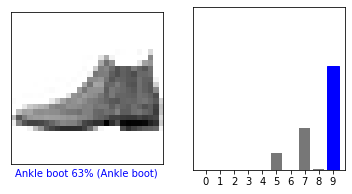

In [64]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

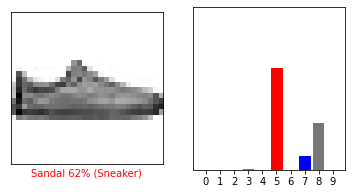

In [65]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

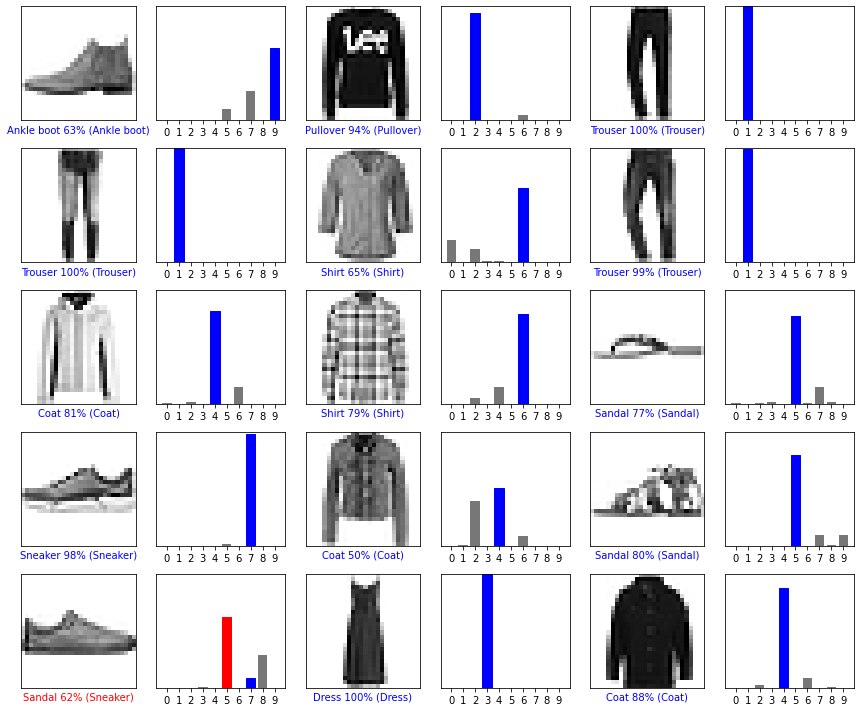

In [66]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [67]:
#prédire sur une seule image
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras modèles sont optimisés pour faire des prédictions sur un lot, ou la collecte, des exemples à la fois. Par conséquent, même si vous utilisez une seule image, vous devez l'ajouter à une liste

In [68]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [69]:
#prediction
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.4639818e-04 2.8469938e-06 9.4491565e-01 4.3427975e-05 7.0436602e-03
  2.4440316e-10 4.7585387e-02 1.2643458e-14 6.2575891e-05 4.8649491e-11]]


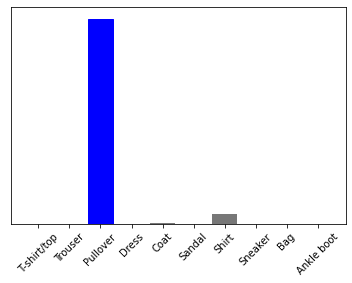

In [70]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [71]:
np.argmax(predictions_single[0])

2

le modele predit l'etiquette comme prévu